In [ ]:
# 📦 Install necessary libraries
!pip install pandas numpy nltk scikit-learn seaborn matplotlib joblib tensorflow streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import streamlit as st
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import load_model
import numpy as np
import os
import zipfile

In [ ]:
# Define the path to your ZIP file
zip_path = "/content/fake_and_real_news.csv.zip"
extract_path = "fake_and_real_news"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Get the extracted CSV file (assuming only one CSV is present)
csv_file = [file for file in os.listdir(extract_path) if file.endswith(".csv")][0]
csv_path = os.path.join(extract_path, csv_file)

# Load dataset
df = pd.read_csv(csv_path)

# Check first few rows
print(df.head())

                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real


In [ ]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [ ]:
# Exploratory Data Analysis
# Count NaN values in the 'label' column
print(df['label'].isnull().sum())

0


In [ ]:
# Check unique labels in the dataset
print(df['label'].unique())

['Fake' 'Real']


In [ ]:
# Data Cleaning & Text Preprocessing

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize words
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a sentence
    return " ".join(words)

In [ ]:
# Apply preprocessing to the text
df['clean_text'] = df['Text'].apply(preprocess_text)


# Display sample processed text
df[['Text', 'clean_text']].head()

,Text,clean_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,top trump surrogate brutally stab back patheti...
1,U.S. conservative leader optimistic of common ...,u conservative leader optimistic common ground...
2,"Trump proposes U.S. tax overhaul, stirs concer...",trump proposes u tax overhaul stir concern def...
3,Court Forces Ohio To Allow Millions Of Illega...,court force ohio allow million illegally purge...
4,Democrats say Trump agrees to work on immigrat...,democrat say trump agrees work immigration bil...


In [ ]:
# Feature Extraction using TF-IDF


# Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Convert labels to binary (1 = Real, 0 = Fake)
y = df['label'].map({'Real': 1, 'Fake': 0})

# Check the shape of X and y
X.shape, y.shape

((9900, 5000), (9900,))

In [ ]:
# Train Random Forest and Naïve Bayes Models (Machine Learning Models)


# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

🔹 Random Forest Model Performance
Accuracy: 99.90%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       973
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



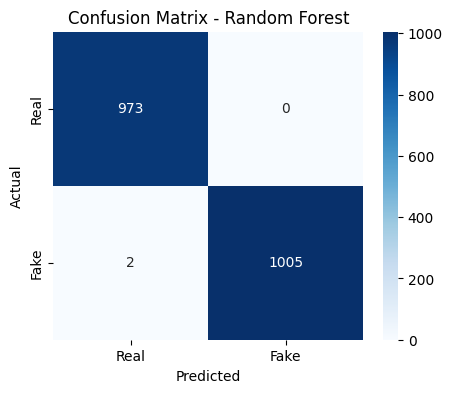

In [ ]:
# Model Evaluation



# Predictions for Random Forest
y_pred_rf = rf_model.predict(X_test)

# Model Performance
print("🔹 Random Forest Model Performance")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

🔹 Naïve Bayes Model Performance
Accuracy: 96.41%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       973
           1       0.96      0.97      0.96      1007

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980



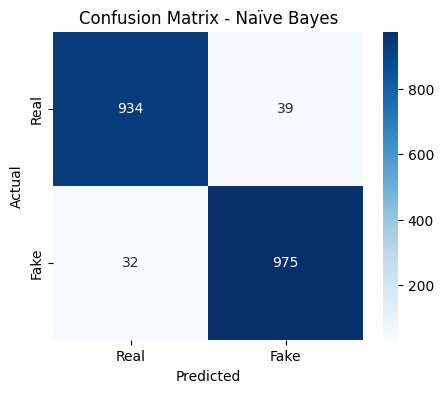

In [ ]:
# Predictions for Naïve Bayes
y_pred_nb = nb_model.predict(X_test)

# Model Performance
print("🔹 Naïve Bayes Model Performance")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_nb) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes")

In [ ]:
# Train LSTM Model (Deep Learning Model)


# Prepare data for LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Tokenize and pad sequences for LSTM model
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])
X_lstm = tokenizer.texts_to_sequences(df['clean_text'])
X_lstm = pad_sequences(X_lstm, maxlen=100)

# Train LSTM model
y_lstm = df['label'].map({'Real': 1, 'Fake': 0})

# Define LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=100),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_lstm, y_lstm, epochs=5, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 66s 485ms/step - accuracy: 0.9580 - loss: 0.2122 - val_accuracy: 0.9980 - val_loss: 0.0087
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 74s 424ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accuracy: 0.9980 - val_loss: 0.0067
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 80s 408ms/step - accuracy: 0.9999 - loss: 5.4934e-04 - val_accuracy: 0.9985 - val_loss: 0.0078
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 107s 609ms/step - accuracy: 1.0000 - loss: 1.3617e-04 - val_accuracy: 0.9980 - val_loss: 0.0092
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 58s 418ms/step - accuracy: 1.0000 - loss: 7.6027e-05 - val_accuracy: 0.9980 - val_loss: 0.0100


In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['clean_text'], y, test_size=0.2, random_state=42)

# Then tokenize test data
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Evaluate LSTM
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\n✅ Total LSTM Model Accuracy: {accuracy * 100:.2f}%")


✅ Total LSTM Model Accuracy: 99.95%


In [ ]:
# Tokenizer for LSTM model
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']

In [ ]:
# Preprocess text function
def preprocess_text(text):
    # Add text preprocessing steps here (e.g., removing punctuation, lowercase, stopwords, etc.)
    return text.lower()

# Prediction function
def predict_news(text):
    # Preprocess the text input
    clean_text = preprocess_text(text)
    vectorized_input = vectorizer.transform([clean_text]).toarray()

    # Naïve Bayes Prediction
    nb_prediction = nb_model.predict(vectorized_input)[0]

    # Random Forest Prediction
    rf_prediction = rf_model.predict(vectorized_input)[0]

    # LSTM Prediction
    lstm_input = tokenizer.texts_to_sequences([clean_text])
    lstm_input = pad_sequences(lstm_input, maxlen=100)
    lstm_prediction = lstm_model.predict(lstm_input)[0][0]

    # Return the predictions
    return {
        "Naïve Bayes": "Real" if nb_prediction else "Fake",
        "Random Forest": "Real" if rf_prediction else "Fake",
        "LSTM": "Real" if lstm_prediction > 0.5 else "Fake"
    }

In [ ]:
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
lstm_model.save('lstm_model.h5')  # For Keras models
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [31]:
# Streamlit Interface
st.title("📰 Fake News Detection")
st.subheader("Check if a news article is Real or Fake using Naïve Bayes, Random Forest, and LSTM models.")

# Input text area for news article
input_text = st.text_area("Enter news article here...", height=200)

if input_text:
    # Predict based on the input text
    predictions = predict_news(input_text)

    # Display predictions
    st.write("### Predictions:")
    st.write(f"**Naïve Bayes:** {predictions['Naïve Bayes']}")
    st.write(f"**Random Forest:** {predictions['Random Forest']}")
    st.write(f"**LSTM:** {predictions['LSTM']}")

2025-04-09 13:25:47.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 13:25:47.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [32]:
!wget -qO- ipv4.icanhazip.com

34.75.197.33


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.197.33:8501

⠼⠴⠦your url is: https://pretty-bobcats-laugh.loca.lt
2025-04-09 13:31:33.577780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744205493.628019   15317 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744205493.643453   15317 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 13:31:38.896817: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
1/1 ━━━━━━━━━━━━━━━━━━━━